In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [15]:
N = 100
D = 2

X = np.random.randn(N, D)
bias = np.array([[1] * N]).T
Xb = np.concatenate((bias, X), axis=1)
weights = np.random.randn(D + 1)
z = Xb.dot(weights)

def sigmoid(z):
    return 1 / (1 * np.exp(-z))

print ('Sigmoid: {}'.format(z))

Sigmoid: [ -1.19282436e+00  -1.84455345e-01  -9.37863200e-01  -9.52958239e-04
  -2.17768142e+00  -8.88110709e-01  -1.51669183e+00  -1.76156490e+00
  -1.11439414e+00  -1.96025539e+00  -3.15848092e-01   3.67120132e-01
  -8.09392956e-01   6.11667081e-01  -9.30527563e-01   2.89741889e-01
  -4.29859902e-01  -8.07418894e-01  -1.54909904e+00  -1.85162318e+00
  -7.23936926e-01  -7.06326468e-01  -1.44155888e+00  -2.10956781e+00
  -1.42441942e+00  -4.06012578e-03  -3.26950605e-02  -1.22207105e+00
  -1.48680647e+00  -1.09016959e-01   1.25419756e-01  -6.81099444e-01
   5.37776847e-01   6.03987890e-01  -1.23637236e+00  -7.10574601e-01
  -8.59477023e-01  -7.06411661e-01   6.11439265e-01  -6.55724641e-01
  -4.90590211e-01  -8.66382604e-01  -1.96764156e+00  -8.10544401e-01
  -1.13083375e+00   2.51067061e-01  -2.82806602e-02  -1.23085118e+00
  -5.10513877e-01  -9.90836312e-01  -2.69338001e+00  -1.60907581e+00
  -1.08060322e+00  -6.88942893e-01  -3.44691832e-01  -6.79911890e-01
  -6.64352967e-01  -5.298

In [50]:
# eCommerce project

def get_data():
    """
    Reading in the CSV file, and then proceed to perform 
    normalization on some variables and one-hot encoding
    on some features
    """
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    print(df.columns)
    
    # Normalization on products viewed and visit duration
    X[:, 1] = (X[:, 1] - np.average(X[:, 1])) / np.std(X[:, 1])
    X[:, 2] = (X[:, 2] - np.average(X[:, 2])) / np.std(X[:, 2])
    
    # Handling categorical value (time of day)
    N, D = X.shape
    new_X = np.zeros((N, D + 3))
    new_X[:, 0:(D - 1)] = X[:, 0:(D - 1)]
    
    for n in range(N):
        t = int(X[n, D - 1])
        new_X[n, t + D - 1] = 1
        
    return new_X, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [83]:
X, Y = get_binary_data()

dimension = X.shape[1]
weights = np.random.randn(dimension)
bias = 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X, weights, bias):
    return sigmoid(X.dot(weights) + bias)

prob_y_given_x = forward(X, weights, bias)
predictions = np.round(prob_y_given_x)

def error_rate(predicted, actual):
    return np.mean(predicted == actual)

print('Score: {}'.format(error_rate(predictions, Y)))

Index(['is_mobile', 'n_products_viewed', 'visit_duration',
       'is_returning_visitor', 'time_of_day', 'user_action'],
      dtype='object')
Score: 0.6331658291457286


In [127]:
# Cross-entropy
N = 100
D = 2

np.random.seed(40)

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

def cross_entropy_error(actual, predicted):
    total_error = 0
    for i in range(N):
        if actual[i] == 1:
            total_error -= np.log(predicted[i])
        else:
            total_error -= np.log(1 - predicted[i])
    return total_error

cross_entropy_error(T, Y)

92.465898895446045

In [129]:
weights = np.array([0, 4, 4])
z = Xb.dot(weights)
Y = sigmoid(z)

cross_entropy_error(T, Y)

0.094873631707782333

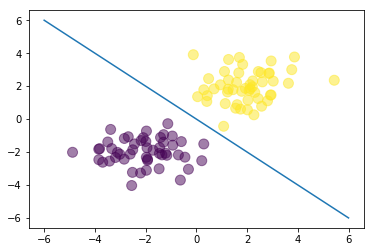

In [137]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)

In [151]:
# Batch gradient descent
N = 100
D = 2

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

learning_rate = 0.1

for _ in range(100):
    if _ % 10 == 0:
        print(cross_entropy_error(T, Y))
    weights += learning_rate * Xb.T.dot(T - Y)
    Y = sigmoid(Xb.dot(weights))
    
print('Final weight: {}'.format(weights))

66.6911544109
0.00666258370558
0.00660099894504
0.006540539757
0.0064811756239
0.00642287711995
0.00636561586276
0.00630936446757
0.00625409650386
0.00619978645419
Final weight: [ 0.24572282  9.35686657  9.88770478]


Index(['is_mobile', 'n_products_viewed', 'visit_duration',
       'is_returning_visitor', 'time_of_day', 'user_action'],
      dtype='object')
iteration 0 train cost 1.2512381427914658 test cost 1.267510837849274
iteration 1000 train cost 0.163615985809597 test cost 0.21707728959307138
iteration 2000 train cost 0.1599163444374833 test cost 0.21343387207765857
iteration 3000 train cost 0.1593403158487249 test cost 0.2130797833292594
iteration 4000 train cost 0.15921933985036626 test cost 0.21310168610456257
iteration 5000 train cost 0.15919104417710866 test cost 0.21315195154066185
iteration 6000 train cost 0.1591841036002997 test cost 0.21318618188454574
iteration 7000 train cost 0.1591823622211032 test cost 0.21320561454848047
iteration 8000 train cost 0.15918192043123724 test cost 0.21321597406227316
iteration 9000 train cost 0.15918180772586793 test cost 0.2132213508569195
Final training accuracy: 0.9748743718592965
Final test accuracy: 0.9698492462311558


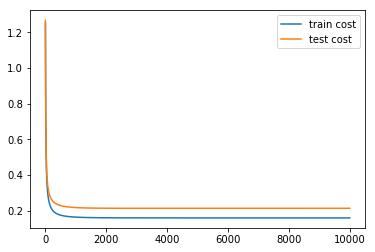

In [173]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, Y = get_binary_data()
X, Y = shuffle(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=40)

D = X.shape[1]
weights = np.random.randn(D)
bias = 0

def cross_entropy(actual, prob_Y):
    return -np.mean(actual * np.log(prob_Y) + (1 - actual) * np.log(1 - prob_Y))

train_cost_list = []
test_cost_list = []
learning_rate = 0.001

for _ in range(10000):
    train_prediction = forward(X_train, weights, bias)
    test_prediction = forward(X_test, weights, bias)
    
    train_cost = cross_entropy(y_train, train_prediction)
    test_cost = cross_entropy(y_test, test_prediction)
    
    train_cost_list.append(train_cost)
    test_cost_list.append(test_cost)
    
    weights -= learning_rate * X_train.T.dot(train_prediction - y_train)
    bias -= learning_rate * (train_prediction - y_train).sum()
    
    if _ % 1000 == 0:
        print('iteration {} train cost {} test cost {}'.format(_, train_cost, test_cost))

print('Final training accuracy: {}'.format(error_rate(np.round(train_prediction), y_train)))
print('Final test accuracy: {}'.format(error_rate(np.round(test_prediction), y_test)))

plt.plot(train_cost_list, label='train cost')
plt.plot(test_cost_list, label='test cost')
plt.legend()